# Handwritten digits recognition (using Convolutional Neural Network)

> - 🤖 See [full list of Machine Learning Experiments](https://github.com/trekhleb/machine-learning-experiments) on **GitHub**<br/><br/>
> - ▶️ **Interactive Demo**: [try this model and other machine learning experiments in action](https://trekhleb.github.io/machine-learning-experiments/)

## Experiment overview

In this experiment we will build a [Convolutional Neural Network](https://en.wikipedia.org/wiki/Convolutional_neural_network) (CNN) model using [Tensorflow](https://www.tensorflow.org/) to recognize handwritten digits.

A **convolutional neural network** (CNN, or ConvNet) is a Deep Learning algorithm which can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image and be able to differentiate one from the other.

![digits_recognition_cnn.png](https://github.com/trekhleb/machine-learning-experiments/blob/master/demos/src/images/digits_recognition_cnn.png?raw=1)

## Import dependencies

- [tensorflow](https://www.tensorflow.org/) - for developing and training ML models.
- [matplotlib](https://matplotlib.org/) - for plotting the data.
- [seaborn](https://seaborn.pydata.org/index.html) - for plotting confusion matrix.
- [numpy](https://numpy.org/) - for linear algebra operations.
- [pandas](https://pandas.pydata.org/) - for displaying training/test data in a table.
- [math](https://docs.python.org/3/library/math.html) - for calculating square roots etc.
- [datetime](https://docs.python.org/3.8/library/datetime.html) - for generating a logs folder names.

In [1]:
# Selecting Tensorflow version v2 (the command is relevant for Colab only).
%tensorflow_version 2.x

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
import math
import datetime
import platform

print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)
print('Keras version:', tf.keras.__version__)

Python version: 3.7.13
Tensorflow version: 2.8.0
Keras version: 2.8.0


## Configuring Tensorboard

We will use [Tensorboard](https://www.tensorflow.org/tensorboard) to debug the model later.

In [3]:
# Load the TensorBoard notebook extension.
# %reload_ext tensorboard
%load_ext tensorboard

In [4]:
# Clear any logs from previous runs.
!rm -rf ./.logs/

## Load the data

The **training** dataset consists of 60000 28x28px images of hand-written digits from `0` to `9`.

The **test** dataset consists of 10000 28x28px images.

In [5]:
mnist_dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [6]:
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


In [7]:
# Save image parameters to the constants that we will use later for data re-shaping and for model traning.
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = x_train.shape
IMAGE_CHANNELS = 1

print('IMAGE_WIDTH:', IMAGE_WIDTH);
print('IMAGE_HEIGHT:', IMAGE_HEIGHT);
print('IMAGE_CHANNELS:', IMAGE_CHANNELS);

IMAGE_WIDTH: 28
IMAGE_HEIGHT: 28
IMAGE_CHANNELS: 1


## Explore the data

Here is how each image in the dataset looks like. It is a 28x28 matrix of integers (from `0` to `255`). Each integer represents a color of a pixel.

In [8]:
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


This matrix of numbers may be drawn as follows: 

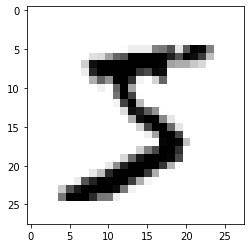

In [9]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

Let's print some more training examples to get the feeling of how the digits were written.

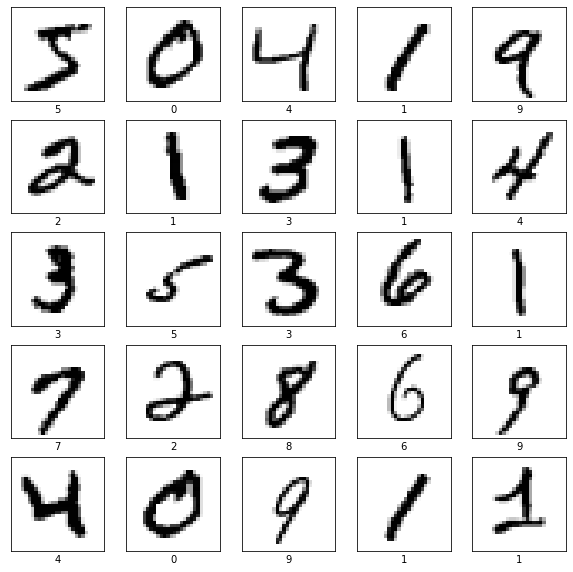

In [10]:
numbers_to_display = 25
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10,10))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

## Reshaping the data

In order to use convolution layers we need to reshape our data and add a color channel to it. As you've noticed currently every digit has a shape of `(28, 28)` which means that it is a 28x28 matrix of color values form `0` to `255`. We need to reshape it to `(28, 28, 1)` shape so that each pixel potentially may have multiple channels (like Red, Green and Blue).

In [11]:
x_train_with_chanels = x_train.reshape(
    x_train.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_test_with_chanels = x_test.reshape(
    x_test.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

In [12]:
print('x_train_with_chanels:', x_train_with_chanels.shape)
print('x_test_with_chanels:', x_test_with_chanels.shape)

x_train_with_chanels: (60000, 28, 28, 1)
x_test_with_chanels: (10000, 28, 28, 1)


## Normalize the data

Here we're just trying to move from values range of `[0...255]` to `[0...1]`.

In [13]:
x_train_normalized = x_train_with_chanels / 255
x_test_normalized = x_test_with_chanels / 255

In [14]:
# Let's check just one row from the 0th image to see color chanel values after normalization.
x_train_normalized[0][18]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.18039216],
       [0.50980392],
       [0.71764706],
       [0.99215686],
       [0.99215686],
       [0.81176471],
       [0.00784314],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

## Build the model

We will use [Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential?version=stable) Keras model.

Then we will have two pairs of [Convolution2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D?version=stable) and [MaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D?version=stable) layers. The MaxPooling layer acts as a sort of downsampling using max values in a region instead of averaging.

After that we will use [Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten?version=stable) layer to convert multidimensional parameters to vector.

The las layer will be a [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense?version=stable) layer with `10` [Softmax](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax?version=stable) outputs. The output represents the network guess. The 0-th output represents a probability that the input digit is `0`, the 1-st output represents a probability that the input digit is `1` and so on...


In [15]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Convolution2D(
    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
    kernel_size=5,
    filters=8,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Convolution2D(
    kernel_size=5,
    filters=16,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu
));

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

Here is our model summary so far.

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 8)         208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          3216      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               3

In order to plot the model the `graphviz` should be installed. For Mac OS it may be installed using `brew` like `brew install graphviz`.

## Train the model

In [34]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    x_train_normalized,
    y_train,
    epochs=10,
    validation_data=(x_test_normalized, y_test),
    callbacks=[tensorboard_callback]
)

Epoch 1/10
 758/1875 [===========>..................] - ETA: 16s - loss: 0.3409 - accuracy: 0.8969

KeyboardInterrupt: ignored

Let's see how the loss function was changing during the training. We expect it to get smaller and smaller on every next epoch.

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='test set')
plt.legend()

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='test set')
plt.legend()

## Evaluate model accuracy

We need to compare the accuracy of our model on **training** set and on **test** set. We expect our model to perform similarly on both sets. If the performance on a test set will be poor comparing to a training set it would be an indicator for us that the model is overfitted and we have a "high variance" issue.

### Training set accuracy

In [21]:
%%capture
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train)

In [22]:
print('Training loss: ', train_loss)
print('Training accuracy: ', train_accuracy)

Training loss:  2.3040835857391357
Training accuracy:  0.12645000219345093


### Test set accuracy

In [23]:
%%capture
validation_loss, validation_accuracy = model.evaluate(x_test_normalized, y_test)

In [24]:
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

Validation loss:  2.306156635284424
Validation accuracy:  0.12520000338554382


## Save the model

We will save the entire model to a `HDF5` file. The `.h5` extension of the file indicates that the model shuold be saved in Keras format as HDF5 file. To use this model on the front-end we will convert it (later in this notebook) to Javascript understandable format (`tfjs_layers_model` with .json and .bin files) using [tensorflowjs_converter](https://www.tensorflow.org/js/tutorials/conversion/import_saved_model) as it is specified in the [main README](https://github.com/trekhleb/machine-learning-experiments).

In [25]:
model_name = 'digits_recognition_cnn.h5'
model.save(model_name, save_format='h5')

In [26]:
loaded_model = tf.keras.models.load_model(model_name)

## Use the model (do predictions)

To use the model that we've just trained for digits recognition we need to call `predict()` method.

In [27]:
predictions_one_hot = loaded_model.predict([x_test_normalized])

In [28]:
print('predictions_one_hot:', predictions_one_hot.shape)

predictions_one_hot: (10000, 10)


Each prediction consists of 10 probabilities (one for each number from `0` to `9`). We need to pick the digit with the highest probability since this would be a digit that our model most confident with.

In [29]:
# Predictions in form of one-hot vectors (arrays of probabilities).
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,0.098567,0.088794,0.110508,0.104943,0.087294,0.124206,0.096010,0.127591,0.067862,0.094226
1,0.066247,0.104602,0.124296,0.103420,0.100700,0.107316,0.138462,0.094350,0.062329,0.098279
2,0.105809,0.092549,0.102712,0.118593,0.079659,0.106719,0.098709,0.100441,0.082985,0.111823
3,0.091113,0.098471,0.112477,0.099448,0.105514,0.128081,0.096592,0.127607,0.048162,0.092534
4,0.096397,0.095936,0.131272,0.090745,0.095191,0.132620,0.080991,0.114763,0.050410,0.111674
...,...,...,...,...,...,...,...,...,...,...
9995,0.097644,0.082620,0.105874,0.119813,0.099237,0.122454,0.113941,0.104544,0.053501,0.100372
9996,0.081868,0.088005,0.133314,0.132576,0.104264,0.116719,0.107134,0.085313,0.053761,0.097046
9997,0.076853,0.093917,0.132922,0.110387,0.091181,0.140855,0.069916,0.095290,0.063382,0.125297
9998,0.076378,0.100366,0.097495,0.117762,0.104997,0.142704,0.074154,0.105341,0.059439,0.121365


In [30]:
# Let's extract predictions with highest probabilites and detect what digits have been actually recognized.
predictions = np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)

,0
0,7
1,6
2,3
3,5
4,5
...,...
9995,5
9996,2
9997,5
9998,5


So our model is predicting that the first example from the test set is `7`.

In [31]:
print(predictions[0])

7


Let's print the first image from a test set to see if model's prediction is correct.

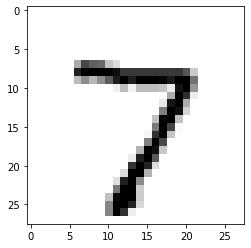

In [32]:
plt.imshow(x_test_normalized[0].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.cm.binary)
plt.show()

We see that our model made a correct prediction and it successfully recognized digit `7`. Let's print some more test examples and correspondent predictions to see how model performs and where it does mistakes.

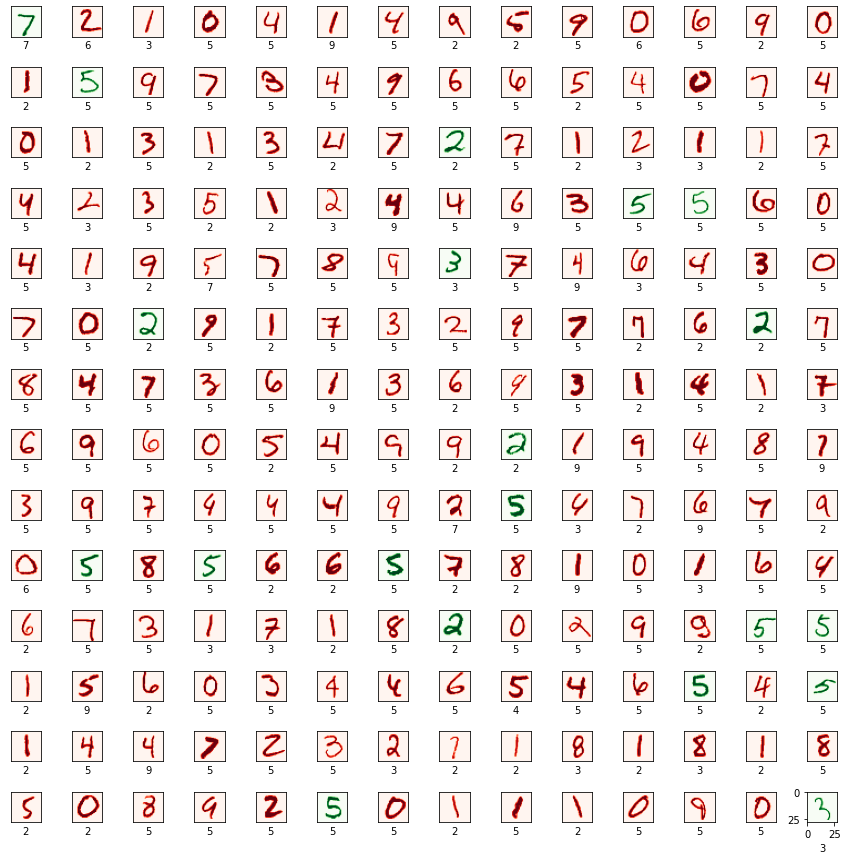

In [33]:
numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):    
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_test[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_test_normalized[plot_index].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()